# TP 1 of Machine Learning

## import classes

In [1]:
import numpy as np
from sklearn import datasets

## load and parse the data file

In [2]:
iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target
np.unique(iris_y)


array([0, 1, 2])

## split the data into training and test sets

In [3]:
np.random.seed(0)
indices = np.random.permutation(len(iris_X))
iris_X_train = iris_X[indices[:-10]]
iris_y_train = iris_y[indices[:-10]]
iris_X_test  = iris_X[indices[-10:]]
iris_y_test  = iris_y[indices[-10:]]

## k-nearest-neighbor model

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier()
knn.fit(iris_X_train,iris_y_train)
print("predict array:", knn.predict(iris_X_test))
print("actual array: ", iris_y_test)
print(accuracy_score( iris_y_test, knn.predict( iris_X_test )))

predict array: [1 2 1 0 0 0 2 1 2 0]
actual array:  [1 1 1 0 0 0 2 1 2 0]
0.9


## Question 1

### the error by default

In [12]:
error = 1-accuracy_score( iris_y_test, knn.predict( iris_X_test ))
print("The error of the classifier:", error)

The error of the classifier: 0.1


### the optimal parametre k

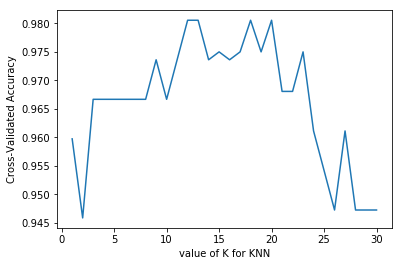

In [47]:
import matplotlib.pyplot as plt

k_range = range(1, 31)

k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, iris_X, iris_y, cv=12, scoring='accuracy')
    k_scores.append(scores.mean())
    
plt.plot(k_range, k_scores)
plt.xlabel('value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

##### so we can find the optimal k is about 12 based on the  accuracy

## Question 2

### Classifiers

##### 1.GaussianNB

In [49]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(iris_X_train, iris_y_train)
print( "predict array:" , gnb.predict(iris_X_test) )
print( "actual array: ", iris_y_test )
print( accuracy_score( iris_y_test, gnb.predict( iris_X_test )) )

predict array: [1 2 1 0 0 0 2 1 2 0]
actual array:  [1 1 1 0 0 0 2 1 2 0]
0.9


##### 2.Tree

In [52]:
from sklearn import tree
tr = tree.DecisionTreeRegressor()
tr = tr.fit(iris_X, iris_y)
print( "predict array:" , tr.predict(iris_X_test) )
print( "actual array: ", iris_y_test )
print( accuracy_score( iris_y_test, tr.predict( iris_X_test )) )

predict array: [ 1.  1.  1.  0.  0.  0.  2.  1.  2.  0.]
actual array:  [1 1 1 0 0 0 2 1 2 0]
1.0


### Cross-validation

In [56]:
from sklearn.cross_validation import cross_val_score

# knn
knn = KNeighborsClassifier()
scores_knn = cross_val_score(knn, iris_X, iris_y, cv=12, scoring='accuracy')
print("k-nearest-neighbor cross-validation:")
print(scores_knn)
print("the average accuracy:", scores_knn.mean())

# gnb
scores_gnb = cross_val_score(gnb, iris_X, iris_y, cv=12, scoring='accuracy')
print("Gaussian-naive-bayes cross-validation:")
print(scores_gnb)
print("the average accuracy:", scores_gnb.mean())

# tree
scores_tree = cross_val_score(tr, iris_X, iris_y, cv=12, scoring='accuracy')
print("Gaussian-naive-bayes cross-validation:")
print(scores_tree)
print("the average accuracy:", scores_tree.mean())

k-nearest-neighbor cross-validation:
[ 1.          0.93333333  1.          1.          0.91666667  0.91666667
  0.91666667  0.91666667  1.          1.          1.          1.        ]
the average accuracy: 0.966666666667
Gaussian-naive-bayes cross-validation:
[ 0.93333333  0.93333333  1.          1.          0.83333333  1.
  0.91666667  0.91666667  0.91666667  1.          1.          1.        ]
the average accuracy: 0.954166666667
Gaussian-naive-bayes cross-validation:
[ 1.          1.          1.          1.          0.92307692  0.84615385
  0.91666667  1.          0.91666667  0.91666667  0.75        0.91666667]
the average accuracy: 0.932158119658


### Comparison of classifiers

##### With the mean accuracy of the three classifier, we can get the conclusion that:
##### By default, the k-nearest-neighbor is the best classifier for the Iris flower data set compared with Tree and GaussianNB